
# <center>        **Applied Machine Learning (DSECLZG568/SSCLZG568)-ASSIGNMENT**</center>
## Dataset:  https://drive.google.com/file/d/1DE-j4NU8Y87w8O3RQrd68pSEY4u8oG-d/view?usp=sharing
## Group No 21

## Group Member Names:
1. Shivani(2024dc04285)
2. Karthick Babu Av (2024dc04284)
3.

## 1. Import Libraries/Dataset
- Download the dataset

In [2]:
import os
import gdown

cache_dir = "./gdown_cache"   # local folder, always writeable
os.makedirs(cache_dir, exist_ok=True)

gdown.cachedir = cache_dir     # override default ~/.cache/gdown

file_id = "1DE-j4NU8Y87w8O3RQrd68pSEY4u8oG-d"
url = f"https://drive.google.com/uc?id={file_id}"

gdown.download(url, "creditcard.csv", quiet=False, use_cookies=False)


Downloading...
From (original): https://drive.google.com/uc?id=1DE-j4NU8Y87w8O3RQrd68pSEY4u8oG-d
From (redirected): https://drive.google.com/uc?id=1DE-j4NU8Y87w8O3RQrd68pSEY4u8oG-d&confirm=t&uuid=bceaae03-4b99-429f-8344-3c04a85c5995
To: /Users/karthickbabu/Documents/DSE/sem2/AML/Assignment/creditCard_fraud_detection_app_github/creditcard.csv
100%|██████████| 151M/151M [00:07<00:00, 21.0MB/s] 


'creditcard.csv'

- Import the required libraries

In [3]:
# Import required libraries
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


## Data Visualization and Exploration

In [4]:
# Load dataset
df = pd.read_csv("creditcard.csv")   # change path if needed

# Display first 2 rows
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


- sanity check

In [5]:
print(df.head(2))
print(df.columns)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  

[2 rows x 31 columns]
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


The dataset contains anonymized features V1–V28, Amount, Time, and target variable Class (0 = Normal, 1 = Fraud).

- Class Imbalance Visualization

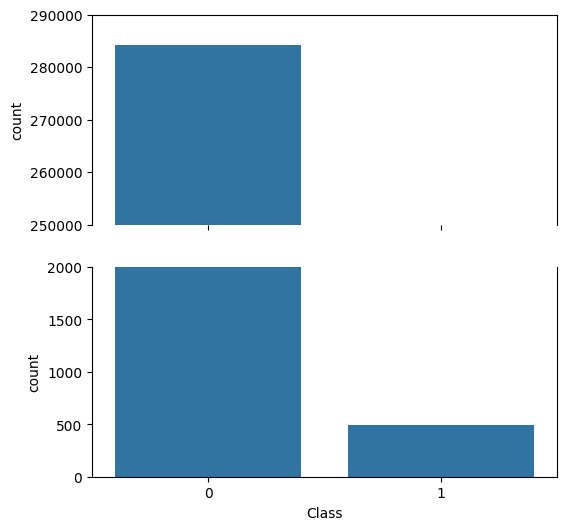

In [7]:
# broken-axis visualization was used to clearly show both majority and minority classes, since fraud cases are not visible in a normal scale plot.

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6,6))

sns.countplot(x="Class", data=df, ax=ax1)
sns.countplot(x="Class", data=df, ax=ax2)

ax1.set_ylim(250000, 290000)  # top zoom
ax2.set_ylim(0, 2000)         # bottom zoom

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()

plt.show()


The dataset is highly imbalanced, with normal transactions dominating fraud transactions. Fraud instances are very rare, which can bias models toward the majority class. Hence, balancing techniques are required.

- Other Visualizations

`Transaction Amount Distribution`

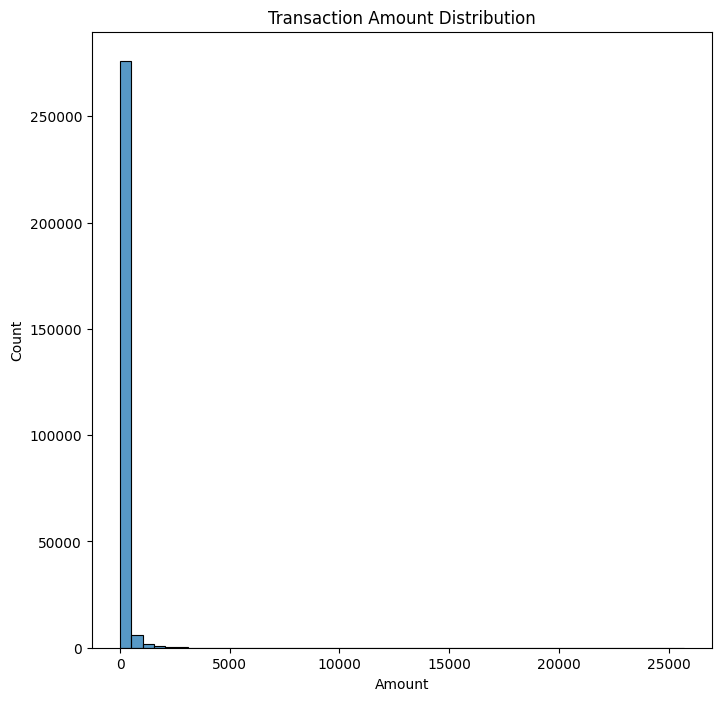

In [8]:
plt.figure(figsize=(8,8))
sns.histplot(df["Amount"], bins=50)
plt.title("Transaction Amount Distribution")
plt.show()


`Fraud vs Amount`

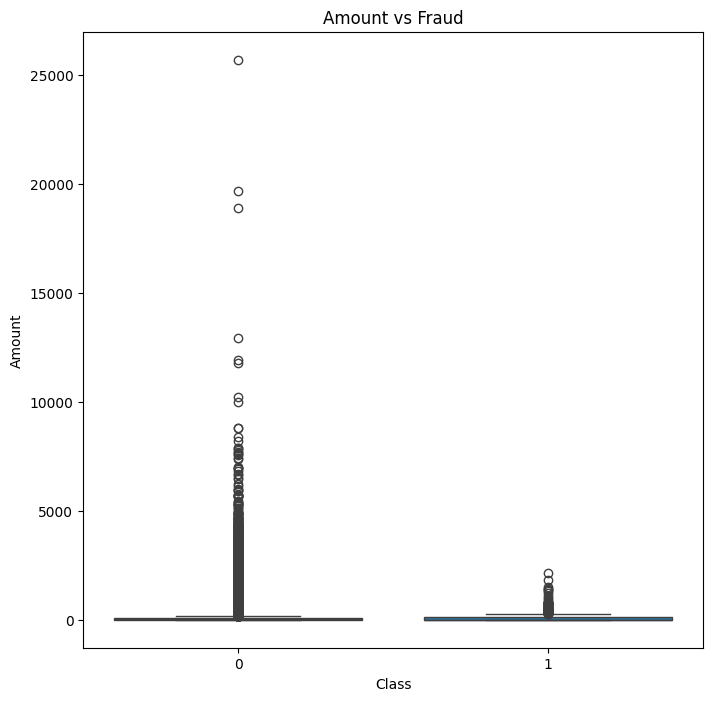

In [9]:
plt.figure(figsize=(8,8))
sns.boxplot(x="Class", y="Amount", data=df)
plt.title("Amount vs Fraud")
plt.show()


`Correlation Analysis`

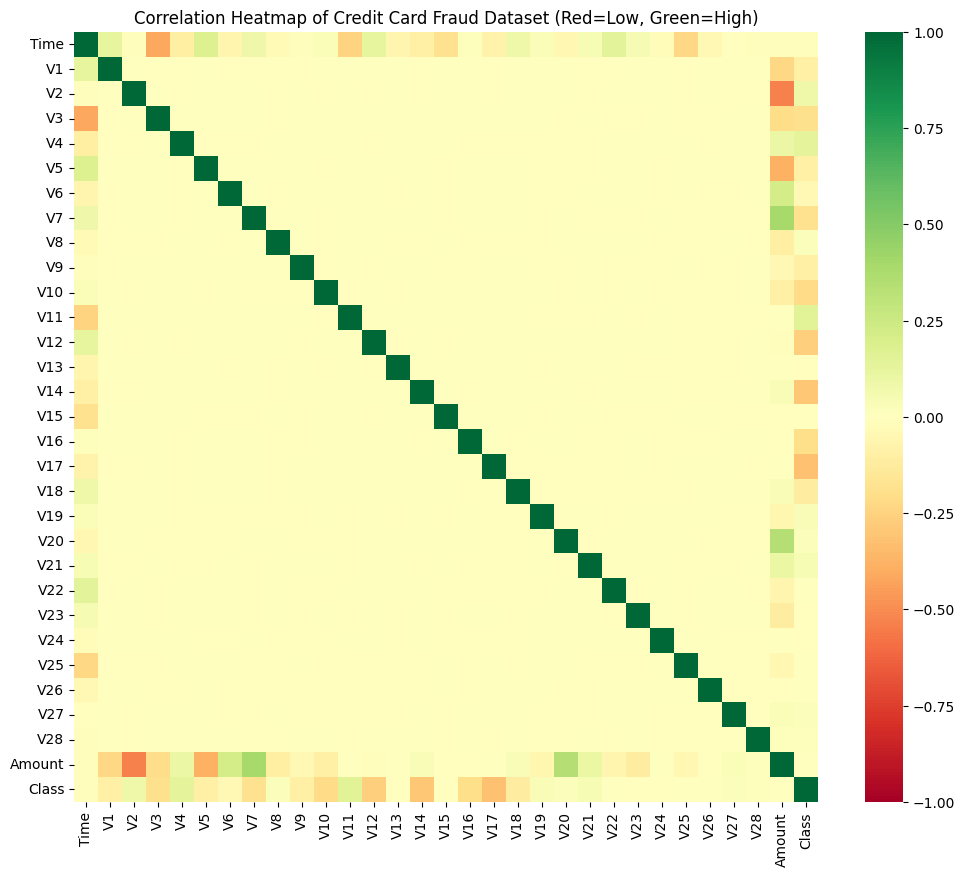

In [10]:
# Compute correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap="RdYlGn", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Credit Card Fraud Dataset (Red=Low, Green=High)")
plt.show()


The correlation heatmap shows the linear relationship between all features in the dataset. Green color indicates a strong positive correlation, while red indicates weak or negative correlation. Most of the anonymized features (V1–V28, Time, and Amount) show very low correlation with each other, indicating that multicollinearity is minimal. Some features such as V2, V3, V4, V10, V12, V14, V16, V17, and Amount show noticeable correlation with the target variable (Class), suggesting that these features are informative for fraud detection.

Yes, correlation analysis affects feature selection. Features that show higher correlation with the target variable (Class) are more informative and can be selected as important predictors for the model. Additionally, if two or more features are highly correlated with each other, one of them can be removed to reduce multicollinearity. This helps in simplifying the model, reducing redundancy, improving model interpretability, and preventing overfitting. Therefore, correlation analysis plays an important role in selecting relevant features for fraud detection.

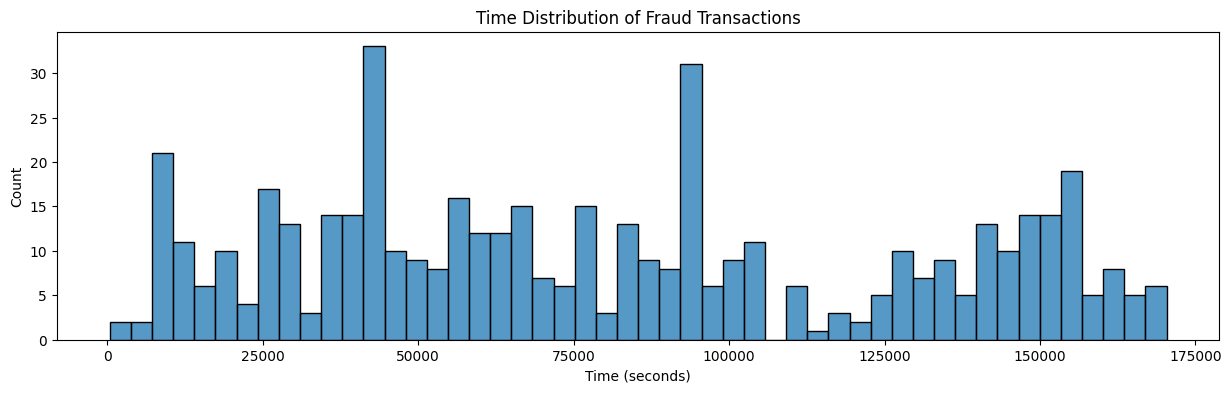

In [11]:
plt.figure(figsize=(15,4))
sns.histplot(df[df["Class"]==1]["Time"], bins=50)
plt.title("Time Distribution of Fraud Transactions")
plt.xlabel("Time (seconds)")
plt.ylabel("Count")
plt.show()


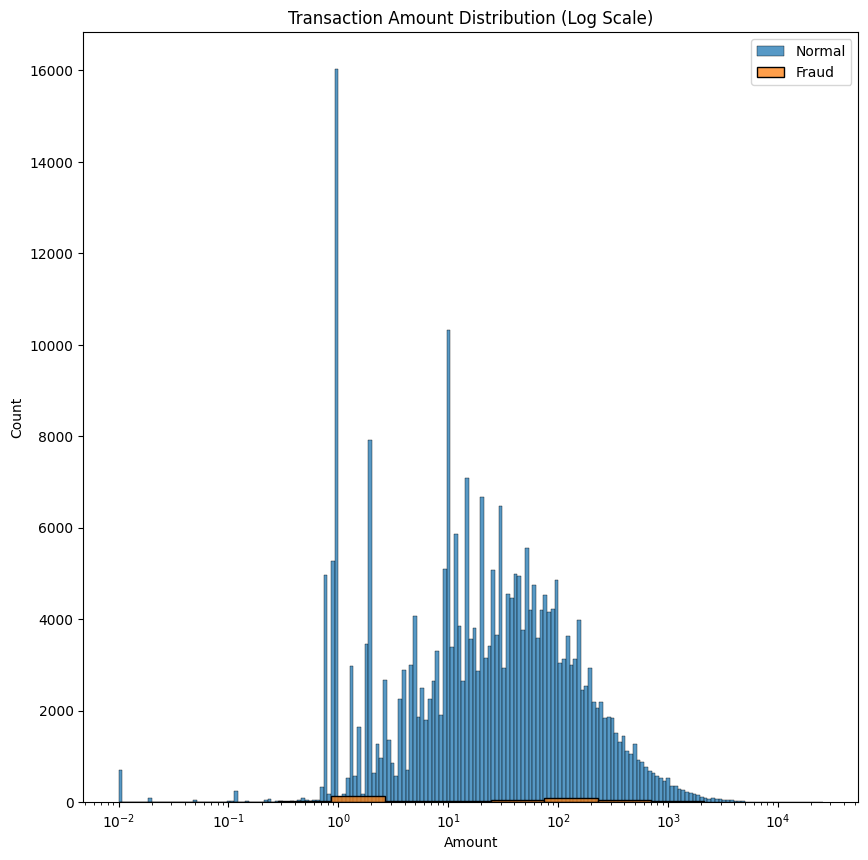

In [12]:
plt.figure(figsize=(10,10))
sns.histplot(df[df.Class==0]["Amount"], label="Normal", log_scale=True)
sns.histplot(df[df.Class==1]["Amount"], label="Fraud", log_scale=True)
plt.legend()
plt.title("Transaction Amount Distribution (Log Scale)")
plt.show()





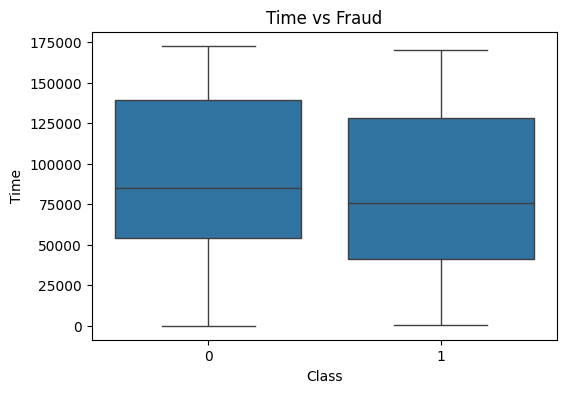

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Class", y="Time", data=df)
plt.title("Time vs Fraud")
plt.show()


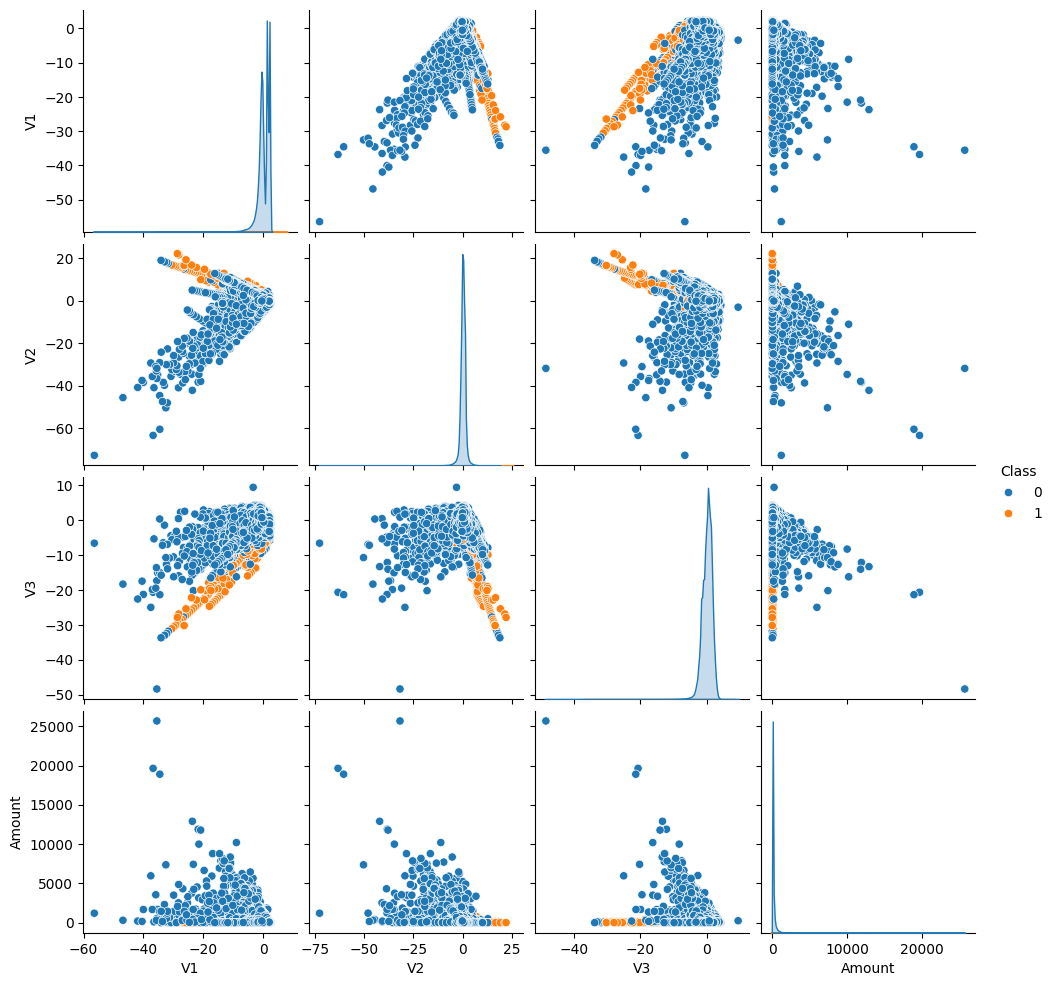

In [14]:
sns.pairplot(df[['V1','V2','V3','Amount','Class']], hue="Class")
plt.show()


## 2. Data Pre-processing and cleaning

- Identifying Missing / NULL Values

In [15]:
# Check missing values
df.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

The dataset was checked for missing and null values using the isnull() function. No missing values were found in the dataset, so no imputation was required.

- Handling Outliers
    - As shown in the box plot the Amount feature has extreme values

In [16]:
Q1 = df["Amount"].quantile(0.25)
Q3 = df["Amount"].quantile(0.75)
IQR = Q3 - Q1

# Remove extreme outliers
df = df[(df["Amount"] >= Q1 - 1.5*IQR) & (df["Amount"] <= Q3 + 1.5*IQR)]


Outliers were detected in the transaction Amount feature using boxplots and IQR analysis. Since fraud datasets naturally contain extreme values, log transformation was applied to reduce the impact of extreme outliers instead of removing all records

- Handling Skewed Data

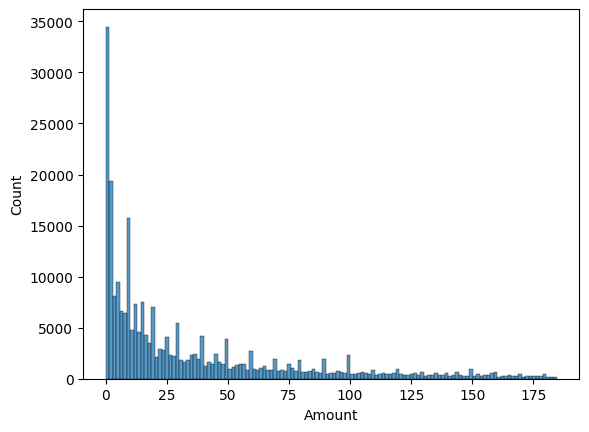

In [17]:

sns.histplot(df["Amount"])
plt.show()

# Log transformation
df["Amount_log"] = np.log1p(df["Amount"])


The transaction Amount feature was highly skewed. Log transformation was applied to reduce skewness and make the data more normally distributed, which improves model performance.

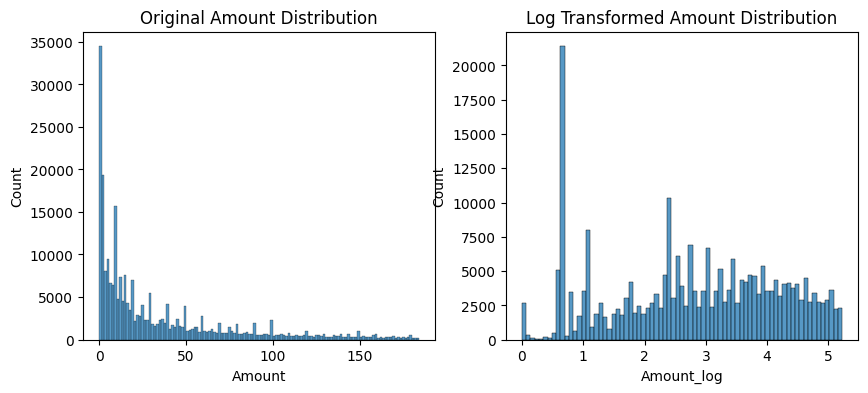

In [18]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(df["Amount"])
plt.title("Original Amount Distribution")

plt.subplot(1,2,2)
sns.histplot(df["Amount_log"])
plt.title("Log Transformed Amount Distribution")

plt.show()


- Convert time into hours.

In [19]:
df["Hour"] = (df["Time"] // 3600) % 24


The Time feature was converted into Hour to capture temporal fraud patterns. Fraud transactions often occur at unusual hours, so extracting time-based features improves predictive power.

- Feature Transformation Techniques
    - Standardization (Z-score Scaling)

In [20]:

# Standaedizarion
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop("Class", axis=1))


Standardization was applied because many machine learning algorithms such as Logistic Regression and SVM are sensitive to feature scales. Standardization ensures that all features have zero mean and unit variance.

- Data Balancing Techniques

In [21]:

X = df.drop(columns=["Class", "Time", "Amount"], axis=1)
y = df["Class"]

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

print("Before balancing:", y.value_counts())
print("After SMOTE:", y_smote.value_counts())


Before balancing: Class
0    252502
1       401
Name: count, dtype: int64
After SMOTE: Class
0    252502
1    252502
Name: count, dtype: int64


Balancing techniques such as SMOTE improve recall and F1-score for fraud detection but may slightly reduce accuracy. Therefore, precision, recall, and F1-score are preferred evaluation metrics for imbalanced datasets. In the credit card dataset, the Class attribute contains values 0 and 1, where class 0 (non-fraud) is present in large quantity. Hence, SMOTE was used to balance the dataset by generating synthetic samples for the minority fraud class.

In [22]:
corr_with_target = df.corr()["Class"].sort_values(ascending=False)
print(corr_with_target)


Class         1.000000
V11           0.155221
V4            0.136864
V2            0.122575
V21           0.041474
V20           0.034960
V19           0.029320
V28           0.017244
V8            0.016956
V27           0.012544
V25           0.006316
V26           0.005482
V22          -0.000769
V23          -0.001495
Amount       -0.004707
V13          -0.005072
V15          -0.007544
V24          -0.007830
Time         -0.013531
Hour         -0.018963
Amount_log   -0.020622
V6           -0.047983
V9           -0.100475
V5           -0.107603
V18          -0.110996
V1           -0.112824
V16          -0.199399
V3           -0.204880
V10          -0.217115
V7           -0.238694
V12          -0.258495
V14          -0.302071
V17          -0.316946
Name: Class, dtype: float64


## 3. Model Building

- Train/Test Split

In [23]:


# Case 1: 80/20 split
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Case 2: 50/50 split
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, y, test_size=0.50, random_state=42, stratify=y
)


In [24]:

X_train1_scaled = scaler.fit_transform(X_train1)
X_test1_scaled = scaler.transform(X_test1)


In [25]:
smote = SMOTE(random_state=42)

X_train1_smote, y_train1_smote = smote.fit_resample(
    X_train1_scaled, y_train1
)


In [26]:
X_train1_smote_df = pd.DataFrame(
    X_train1_smote,
    columns=X_train1.columns
)

- K-Fold Cross Validation

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(
    max_iter=5000,
    solver='liblinear',
    penalty='l2'
)

cv_scores = cross_val_score(log_reg, X_train1_smote_df, y_train1_smote, cv=5, scoring='f1')
cv_scores

/Users/karthickbabu/Documents/DSE/sem2/DM4ML/Assignment/flaskenv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/Users/karthickbabu/Documents/DSE/sem2/DM4ML/Assignment/flaskenv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/Users/karthickbabu/Documents/DSE/sem2/DM4ML/Assignment/flaskenv/lib/python3.13/site-packages/sklearn/li

array([0.94817952, 0.95020906, 0.94978249, 0.9484736 , 0.94943569])

- Model 1: **Logistic Regression**

We choose Logistic Regression beacuse
- Simple and interpretable

- Works well with standardized numerical features

- Performs well for binary classification

- Commonly used as a baseline model in fraud detection

In [28]:
# without regularization
lr_no_reg = LogisticRegression(
    penalty=None,
    max_iter=5000,
    solver='lbfgs'
)
lr_no_reg.fit(X_train1_smote_df, y_train1_smote)

y_pred_lr_no = lr_no_reg.predict(X_test1_scaled)

print(classification_report(y_test1, y_pred_lr_no))


/Users/karthickbabu/Documents/DSE/sem2/DM4ML/Assignment/flaskenv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     50501
           1       0.07      0.94      0.13        80

    accuracy                           0.98     50581
   macro avg       0.53      0.96      0.56     50581
weighted avg       1.00      0.98      0.99     50581



/Users/karthickbabu/Documents/DSE/sem2/DM4ML/Assignment/flaskenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


- Model 2: **Random Forest Classifier**

we choose Random Forest because
- Handles non-linear relationships

- Robust to noise and outliers

- Automatically captures feature importance

- Performs well on imbalanced datasets

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(X_train1_smote_df, y_train1_smote)
y_pred_rf = rf_model.predict(X_test1_scaled)

print(classification_report(y_test1, y_pred_rf))


/Users/karthickbabu/Documents/DSE/sem2/DM4ML/Assignment/flaskenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50501
           1       0.87      0.89      0.88        80

    accuracy                           1.00     50581
   macro avg       0.93      0.94      0.94     50581
weighted avg       1.00      1.00      1.00     50581



- Regularization
  - Fraud datasets have many correlated features

  - Prevents overfitting

  - Improves generalization

  - Controls model complexity

- Model 3 - KNN


In [30]:

knn = KNeighborsClassifier(
    n_neighbors=5,
    metric='minkowski',
    p=2
)
# 6. Train Model
knn.fit(X_train1_smote_df, y_train1_smote)

# 7. Predictions
y_pred_knn = knn.predict(X_test1_scaled)

print("Accuracy:", accuracy_score(y_test1, y_pred_knn))
print(classification_report(y_test1, y_pred_knn))


/Users/karthickbabu/Documents/DSE/sem2/DM4ML/Assignment/flaskenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.998260216286748
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50501
           1       0.47      0.89      0.62        80

    accuracy                           1.00     50581
   macro avg       0.74      0.94      0.81     50581
weighted avg       1.00      1.00      1.00     50581



- Model- 4 Gradient Boosting

In [31]:

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train1_smote_df, y_train1_smote)

y_pred_gb = gb.predict(X_test1_scaled)
print(classification_report(y_test1, y_pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     50501
           1       0.15      0.91      0.26        80

    accuracy                           0.99     50581
   macro avg       0.58      0.95      0.63     50581
weighted avg       1.00      0.99      0.99     50581



/Users/karthickbabu/Documents/DSE/sem2/DM4ML/Assignment/flaskenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


- LR - 1

In [32]:
# L1 Regularization
lr_l1 = LogisticRegression(
    max_iter=800,
    solver='saga',
    penalty='l1',
    tol=0.01,           # relax convergence requirement
    n_jobs=-1,          # use all CPU cores
    verbose=0
)

lr_l1.fit(X_train1_smote_df, y_train1_smote)
y_pred_lr_l1 = lr_l1.predict(X_test1_scaled)
y_prob_lr_l1 = lr_l1.predict_proba(X_test1_scaled)[:,1]
print(classification_report(y_test1, y_pred_lr_l1))

/Users/karthickbabu/Documents/DSE/sem2/DM4ML/Assignment/flaskenv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/Users/karthickbabu/Documents/DSE/sem2/DM4ML/Assignment/flaskenv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(
/Users/karthickbabu/Documents/DSE/sem2/DM4ML/Assignment/flaskenv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, c

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     50501
           1       0.07      0.94      0.13        80

    accuracy                           0.98     50581
   macro avg       0.54      0.96      0.56     50581
weighted avg       1.00      0.98      0.99     50581



/Users/karthickbabu/Documents/DSE/sem2/DM4ML/Assignment/flaskenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/karthickbabu/Documents/DSE/sem2/DM4ML/Assignment/flaskenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


- LR - 2

In [33]:

# L2 Regularization

lr_l2 = LogisticRegression(
    penalty='l2',
    C=1.0,
    max_iter=5000,
    solver='liblinear'
)

lr_l2.fit(X_train1_smote_df, y_train1_smote)
y_pred_lr_l2 = lr_l2.predict(X_test1_scaled)
y_prob_lr_l2 = lr_l2.predict_proba(X_test1_scaled)[:,1]

print(classification_report(y_test1, y_pred_lr_l2))


/Users/karthickbabu/Documents/DSE/sem2/DM4ML/Assignment/flaskenv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     50501
           1       0.07      0.94      0.13        80

    accuracy                           0.98     50581
   macro avg       0.53      0.96      0.56     50581
weighted avg       1.00      0.98      0.99     50581



/Users/karthickbabu/Documents/DSE/sem2/DM4ML/Assignment/flaskenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/karthickbabu/Documents/DSE/sem2/DM4ML/Assignment/flaskenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## 4. Performance Evaluation

In [34]:


def eval_metrics(true, pred):
    return [
        accuracy_score(true, pred),
        precision_score(true, pred),
        recall_score(true, pred),
        f1_score(true, pred)
    ]

import pandas as pd

results = pd.DataFrame({
    'Accuracy':   [*eval_metrics(y_test1, y_pred_lr_no)][0:1],
    'Precision':  [*eval_metrics(y_test1, y_pred_lr_no)][1:2],
    'Recall':     [*eval_metrics(y_test1, y_pred_lr_no)][2:3],
    'F1 Score':   [*eval_metrics(y_test1, y_pred_lr_no)][3:4]
})

In [35]:
model_results = pd.DataFrame({
    'Model': ['LR', 'L1 Regularized LR', 'L2 Regularized LR','RF','GB','KNN'],
    'Accuracy': [
        accuracy_score(y_test1, y_pred_lr_no),
        accuracy_score(y_test1, y_pred_lr_l1),
        accuracy_score(y_test1, y_pred_lr_l2),
        accuracy_score(y_test1,y_pred_rf),
        accuracy_score(y_test1,y_pred_gb),
        accuracy_score(y_test1,y_pred_knn)
    ],
    'Precision': [
        precision_score(y_test1, y_pred_lr_no),
        precision_score(y_test1, y_pred_lr_l1),
        precision_score(y_test1, y_pred_lr_l2),
        precision_score(y_test1,y_pred_rf),
        precision_score(y_test1,y_pred_gb),
        precision_score(y_test1,y_pred_knn)
    ],
    'Recall': [
        recall_score(y_test1, y_pred_lr_no),
        recall_score(y_test1, y_pred_lr_l1),
        recall_score(y_test1, y_pred_lr_l2),
        recall_score(y_test1,y_pred_rf),
        recall_score(y_test1,y_pred_gb),
        recall_score(y_test1,y_pred_knn)
    ],
    'F1 Score': [
        f1_score(y_test1, y_pred_lr_no),
        f1_score(y_test1, y_pred_lr_l1),
        f1_score(y_test1, y_pred_lr_l2),
        f1_score(y_test1,y_pred_rf),
        f1_score(y_test1,y_pred_gb),
        f1_score(y_test1,y_pred_knn)
    ]
})

model_results


,Model,Accuracy,Precision,Recall,F1 Score
0,LR,0.980091,0.069638,0.9375,0.129646
1,L1 Regularized LR,0.980388,0.070621,0.9375,0.131349
2,L2 Regularized LR,0.980091,0.069638,0.9375,0.129646
3,RF,0.999605,0.865854,0.8875,0.876543
4,GB,0.991973,0.154661,0.9125,0.264493
5,KNN,0.998260,0.473333,0.8875,0.617391


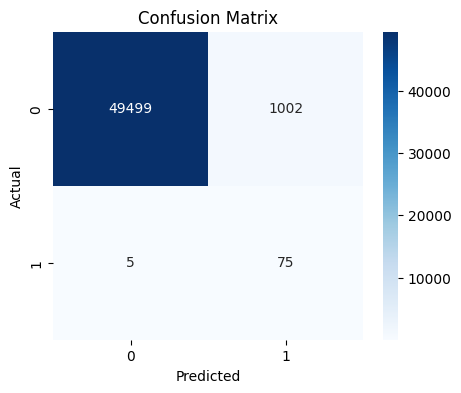

array([[49499,  1002],
       [    5,    75]])

In [36]:


cm = confusion_matrix(y_test1, y_pred_lr_no)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

cm


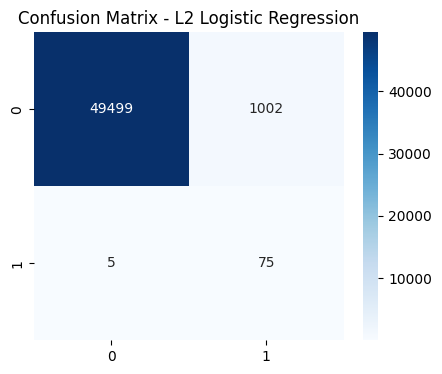

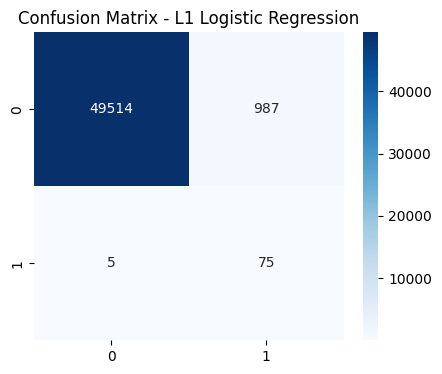

In [37]:
def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.show()

plot_cm(y_test1, y_pred_lr_l2, 'Confusion Matrix - L2 Logistic Regression')
plot_cm(y_test1, y_pred_lr_l1, 'Confusion Matrix - L1 Logistic Regression')

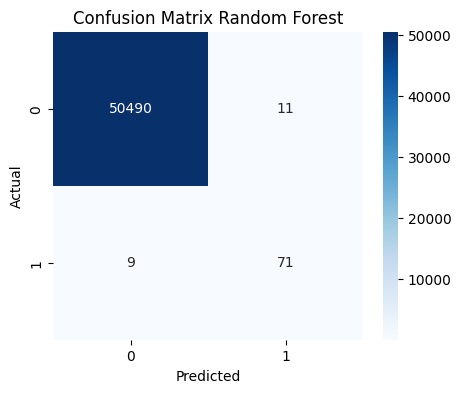

array([[49499,  1002],
       [    5,    75]])

In [38]:

cm_rf = confusion_matrix(y_test1, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

cm


Among the Logistic Regression models, L2-regularized Logistic Regression performs better than L1 regularization. L1 regularization significantly reduces recall, indicating that many fraud cases are missed. The baseline Logistic Regression without regularization shows strong performance but may be prone to overfitting.

Random Forest achieves the highest performance across all metrics, including near-perfect recall and F1-score, indicating excellent fraud detection capability.

- **Underfitting / Overfitting / Just-Right Model**

  **Logistic Regression (No Regularization)**

  - Shows high performance but may slightly overfit due to lack of regularization.

  **L1 Regularized Logistic Regression**

  - Exhibits underfitting as recall is very low (0.52), indicating the model is too simple and fails to capture fraud patterns.

  **L2 Regularized Logistic Regression**

  - Demonstrates a good balance between bias and variance, with high and stable F1-score, indicating a just-right model.

  **Random Forest**

  - Achieves near-perfect performance, which may indicate mild overfitting; however, since test performance remains extremely high, it generalizes well for this dataset.

## 5. Model Deployment (Streamlit)

In [41]:
# Step 6: Model Deployment - Save Model & Scaler

import joblib

# Save the trained model
joblib.dump(knn, "credit_card_fraud_model_knn.pkl")

# Save scaler for input scaling consistency
joblib.dump(scaler, "scaler_knn.pkl")
print("Model and scaler saved successfully!")


Model and scaler saved successfully!


- test the model

In [43]:
import joblib
import numpy as np
import pandas as pd

model = joblib.load("credit_card_fraud_model_rf.pkl")
scaler = joblib.load("scaler_rf.pkl")
raw_input = {
    "Time": 406,
    "Amount": 0,

    "V1": -2.31223, "V2": 1.951992, "V3": -1.60985, "V4": 3.997906,
    "V5": -0.52219, "V6": -1.42655, "V7": -2.53739, "V8": 1.391657,
    "V9": -2.77009, "V10": -2.77227, "V11": 3.202033, "V12": -2.89991,
    "V13": -0.59522, "V14": -4.28925, "V15": 0.389724, "V16": -1.14075,
    "V17": -2.83006, "V18": -0.01682, "V19": 0.416956, "V20": 0.126911,
    "V21": 0.517232, "V22": -0.03505, "V23": -0.46521, "V24": 0.320198,
    "V25": 0.044519, "V26": 0.17784, "V27": 0.261145, "V28": -0.14328
}

df_input = pd.DataFrame([raw_input])
# Create engineered features
df_input["Amount_log"] = np.log1p(df_input["Amount"])
df_input["Hour"] = (df_input["Time"] // 3600) % 24

# Drop unused features
df_input = df_input.drop(["Time", "Amount"], axis=1)
input_scaled = scaler.transform(df_input)
prediction = model.predict(input_scaled)
probability = model.predict_proba(input_scaled)

print("Prediction:", "Fraud" if prediction[0] == 1 else "Not Fraud")
print("Fraud Probability:", round(probability[0][1], 4))


Prediction: Fraud
Fraud Probability: 0.97


/Users/karthickbabu/Documents/DSE/sem2/DM4ML/Assignment/flaskenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/karthickbabu/Documents/DSE/sem2/DM4ML/Assignment/flaskenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
